Análisis 1D --- Graficas de Comparación
===

* 60:00 min | Última modificación: Abril 5, 2021 | [YouTube]()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

## sns.countplot()

## pywaffle

In [5]:
!pip3 install --quiet pywaffle

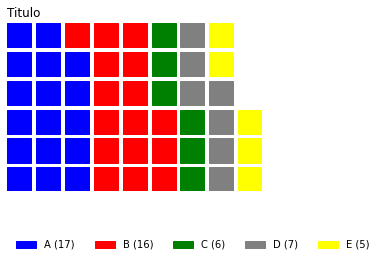

In [7]:
from pywaffle import Waffle

data = {'A': 17, 'B': 16, 'C': 6, 'D': 7, 'E': 5}

fig = plt.figure(
    FigureClass=Waffle,
    rows=6,
    values=data,
    colors=('blue', 'red', 'green', 'gray', 'yellow'), 
    title=dict(label='Titulo', loc='left'),
    labels=["{} ({})".format(k, v) for k, v in data.items()],
    legend=dict(loc='lower left', bbox_to_anchor=(0, -0.4), ncol=len(data), framealpha=0)
)

## Squarify

In [8]:
!pip3 install --quiet squarify

(0.0, 100.0, 0.0, 100.0)

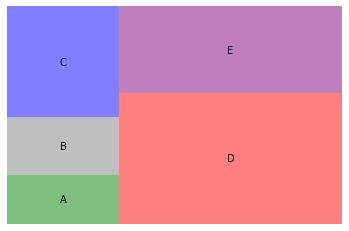

In [11]:
import squarify

data = [10, 12, 23, 54, 36]
labels = list("ABCDE")

squarify.plot(
    sizes=data,
    label=labels,
    color='green,grey,blue,red,purple'.split(','),
    alpha=0.5,
)
plt.axis("off")

## pandas.dataframe.bar()

In [60]:
df = pd.DataFrame(
    data={"valor": [220, -30, -50, -20, 150, -10]},
    index=list("ABCDEF"),
)

df.head()

valor
A    220
B    -30
C    -50
D    -20
E    150

In [61]:
df['cumsum'] = df.valor.cumsum().shift(1).fillna(0)
df.head()

valor  cumsum
A    220     0.0
B    -30   220.0
C    -50   190.0
D    -20   140.0
E    150   120.0

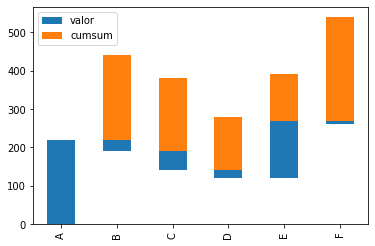

In [62]:
df.plot.bar(
    stacked=True,
    bottom=df['cumsum'],
)

In [63]:
cumsum = df.valor.cumsum().shift(1).fillna(0)

h_lines = cumsum.reset_index(drop=True).repeat(3).shift(-1)
h_lines[1::3] = np.nan
h_lines

0      0.0
0      NaN
0    220.0
1    220.0
1      NaN
1    190.0
2    190.0
2      NaN
2    140.0
3    140.0
3      NaN
3    120.0
4    120.0
4      NaN
4    270.0
5    270.0
5      NaN
5      NaN
Name: valor, dtype: float64

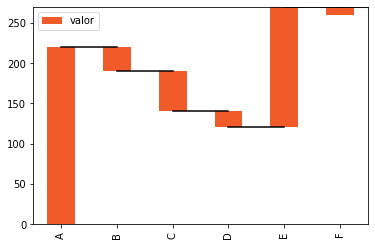

In [72]:
df['total'] = df.sum().valor
cumsum.loc['total'] = 0


fig = df[['valor']].plot.bar(
    stacked=True,
    bottom=df['cumsum'],
    color="#F15B2A",
) 

cumsum['total'] = df[:-1].sum().valor
h_lines = cumsum.reset_index(drop=True).repeat(3).shift(-1)
h_lines[1::3]=np.nan

fig.plot(h_lines.index, h_lines.values, 'black',)

## pandas.lag_plot()

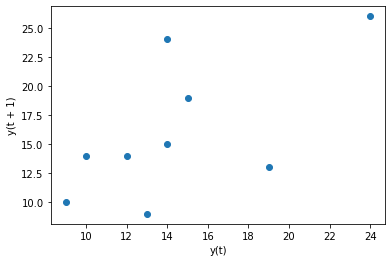

In [12]:
ts_data = pd.DataFrame(
    data={
        'yt': [12, 14, 15, 19, 13, 9, 10, 14, 24, 26]
    }
)

pd.plotting.lag_plot(ts_data, lag=1)

## subplot

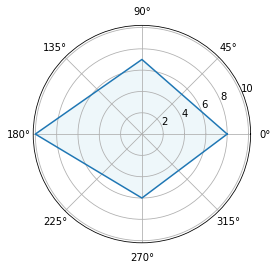

In [13]:
data_dir = {
    'A': [8],
    'B': [7],
    'C': [10],
    'D': [6],
}

data_df = pd.DataFrame(data_dir)


values = data_df.iloc[0].tolist()
values.append(values[0])
angles = [a/4 * 2 * np.pi for a in range(4)]
angles.append(angles[0])

plt.subplot(111, polar=True)
plt.plot(angles, values)
plt.fill(angles, values, "lightblue", alpha=0.2)

## Geopandas

In [14]:
!pip3 install --quiet geopandas

In [15]:
!apt-get update
!apt-get install -yq --no-install-recommends libproj-dev proj-data proj-bin

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:4 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2295 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [2731 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2200 kB]
Fetched 7478 kB in 2s (3058 kB/s)                         
Reading package lists... Done
Reading package lists...
Building dependency tree...
Reading state information...
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [16]:
!apt-get install -yq libgeos-dev

Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [17]:
!pip3 install --quiet cython

In [18]:
!pip3 install --quiet cartopy

In [19]:
!pip3 install --quiet mapclassify

In [20]:
!pip3 install --quiet geoplot

In [21]:
import geopandas
import geoplot

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
df['gdp_pp'] = df.gdp_md_est / df.pop_est

df.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry    gdp_pp  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  0.009093  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  0.002791  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  0.001503  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  0.046991  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  0.056823

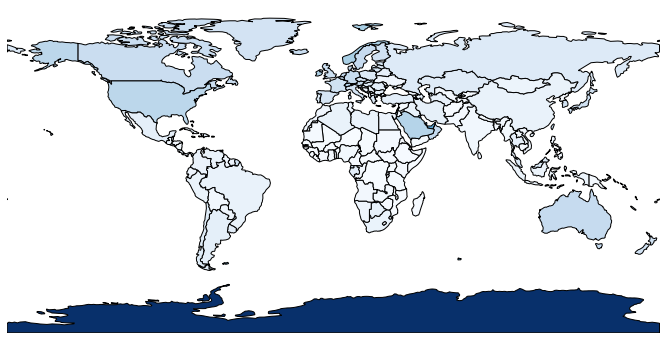

In [22]:
geoplot.choropleth(df, hue='gdp_pp', cmap='Blues', figsize=(12, 6))